# MAGNets Example

We will demonstrate reducing the hydraulic model of network KY2 (available here: https://github.com/meghnathomas/MAGNets/tree/master/examples/networks).

### Import Packages

In [10]:
import magnets as mg
import time
import wntr 
import matplotlib.pyplot as plt
import networkx.drawing.nx_pylab as nxp

### Network Plotting

In [11]:
# Red squares represent reservoirs and blue hexagons represent tanks

def plot_network(wn, title, num):

    G = wn.get_graph()
    G_edge_list = list(G.edges())

    pos_dict = {}
    for node_name, node in wn.nodes():
        pos_dict[node_name] = node.coordinates
                  
    plt.sca(ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, node_size = 10, node_color = 'k', ax = ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, nodelist = wn.tank_name_list, node_size = 30, node_color = 'b', node_shape = 'h', ax = ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, nodelist = wn.reservoir_name_list, node_size = 30, node_color = 'r', node_shape = 's', ax = ax[num])
    nxp.draw_networkx_edges(G, pos_dict, edgelist = G_edge_list, edge_color = 'k', width = 1, arrows = False, ax = ax[num])
    ax[num].set_axis_off
    ax[num].set_title(title)

## Basic Model Reduction
MAGNets' `reduce_model` function allows the user to reduce the hydraulic model of a water distribution network (WDN) to a hydraulically equivalent model with fewer nodes. The `reduce_model` function has one required input - the .inp file of the model to be reduced - and two outputs: (1) a water network model object of the reduced network model, and (2) a .inp file of the reduced network written into the folder it is located in. The reduced network model can be accessed by storing the water network model output of the `reduce_model` function within a variable (`mg1` in the following example) or by importing the .inp file of the reduced model through WNTR (`wn2` in the following example).

Total reduction time: 5.13 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  5 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  10 


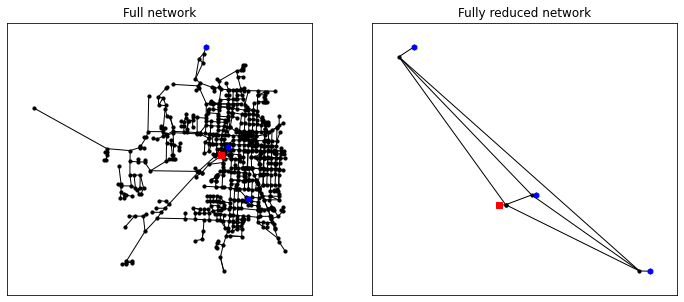

In [12]:
# In this example we access the reduced model by importing the .inp file of the reduced model through WNTR as wn2.

# Define .INP file of network model to be reduced
inp_file = 'ky2.inp'

# Call model reduction function
t1 = time.time()
mg1 = mg.reduction.reduce_model(inp_file)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
wn2 = wntr.network.WaterNetworkModel('reduced 0 ky2.inp') 
plot_network(wn2, 'Fully reduced network', 1)

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", wn2.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", wn2.num_pipes, "\033[0;0m")

`reduce_model` allows three additional inputs:
1. `op_pt`: the operating point around which the model will be linearized. This value must be a multiple of the reporting time step.
2. `nodes_to_keep`: a list of nodes to retained in the reduced model. If the user does not provide a list of nodes to keep, every junction that is not connected to a tank, reservoir, pump, or valve will be removed from the reduced model.
3. `max_nodal_degree`: the maximum nodal degree of nodes being removed from the model. The nodal degree of a node is equal to the number of pipes incident to the node.

## Provide Operating Point and a List of Nodes to Keep

Total reduction time: 5.84 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  7 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  19 


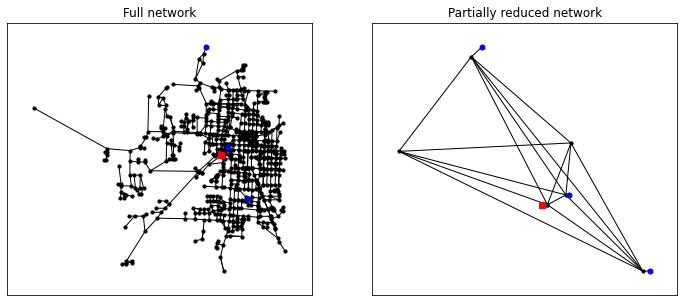

In [13]:
# In this example we access the reduced model by importing the .inp file of the reduced model through WNTR as wn3.

# Specify operating point (optional)
op_pt = 3

# Specify list of nodes to keep (optional)
list_of_nodes_to_keep = ['J-103','J-50']

# Specify maximum nodal degree of nodes being removed from the model (optional)
# max_nodal_degree = 1 indicates removal of only branches and merging of parallel pipes
# max_nodal_degree = 2 indicates removal of branches, merging of parallel pipes, and merging of pipes in series
max_nodal_degree = None 

# Call model reduction function
t1 = time.time()
mg2 = mg.reduction.reduce_model(inp_file, op_pt, list_of_nodes_to_keep, max_nodal_degree)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
wn3 = wntr.network.WaterNetworkModel('reduced 3 ky2.inp') 
plot_network(wn3, 'Partially reduced network', 1)

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", wn3.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", wn3.num_pipes, "\033[0;0m")

## Remove All Branches

Total reduction time: 1.94 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  593 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  897 


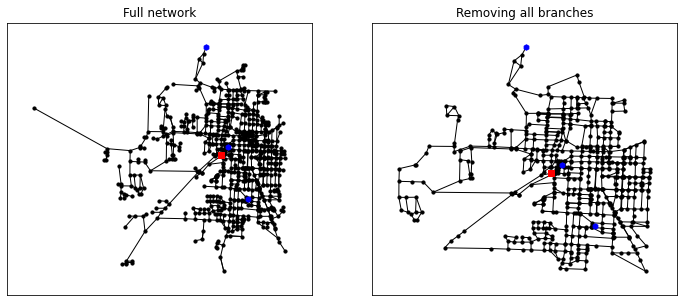

In [14]:
# In this example we access the reduced model by storing the water network model object of the reduced model in variable mg3.

#Specify maximum nodal degree in reduced model (optional)
max_nodal_degree = 1 

# Call model reduction function
t1 = time.time()
mg3 = mg.reduction.reduce_model(inp_file, None, None, max_nodal_degree)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
plot_network(mg3, 'Removing all branches', 1)

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", mg3.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", mg3.num_pipes, "\033[0;0m")

## Remove All Branches and Pipes in Series

Total reduction time: 1.76 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  459 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  752 


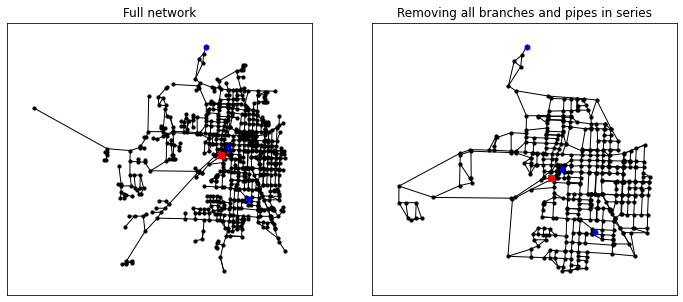

In [15]:
# In this example we access the reduced model by storing the water network model object of the reduced model in variable mg4.

# Specify maximum nodal degree in reduced model
max_nodal_degree = 2 

# Call model reduction function
t1 = time.time()
mg4 = mg.reduction.reduce_model(inp_file, None, None, max_nodal_degree)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
plot_network(mg4, 'Removing all branches and pipes in series', 1)

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", mg4.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", mg4.num_pipes, "\033[0;0m")